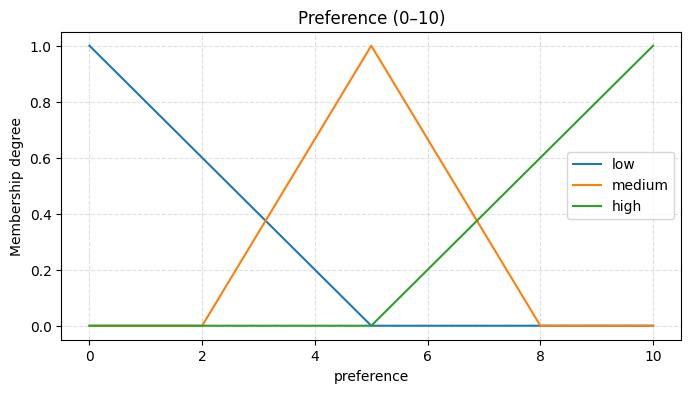

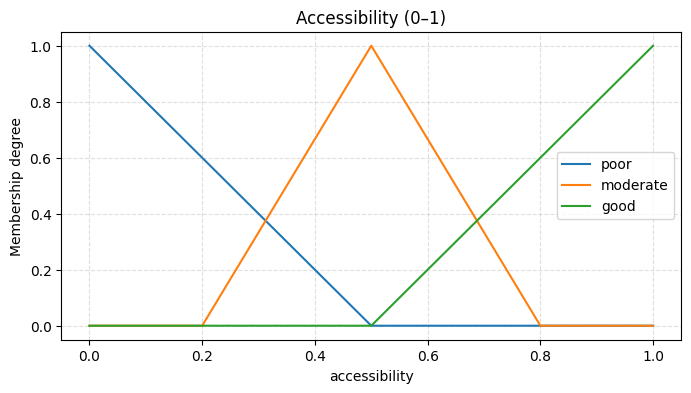

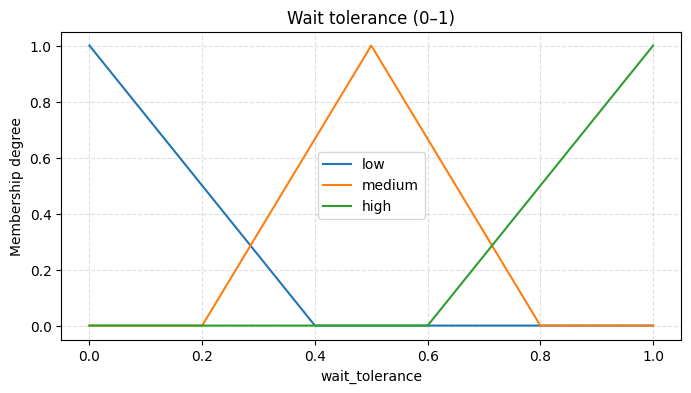

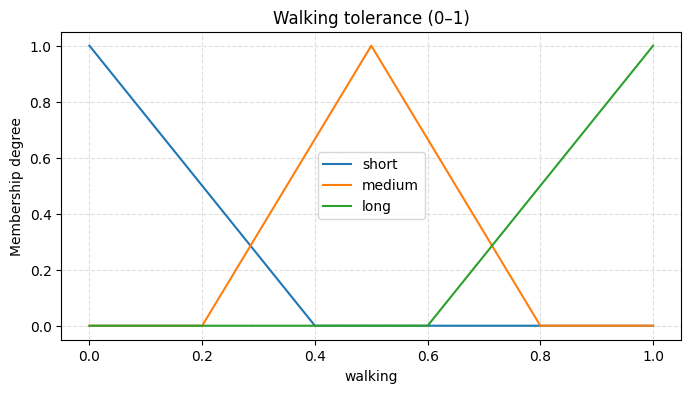

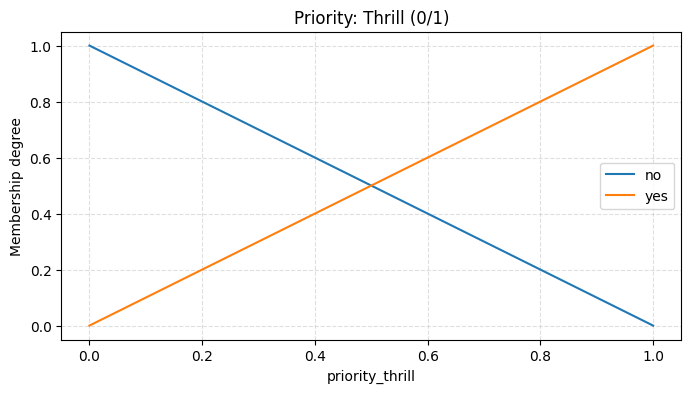

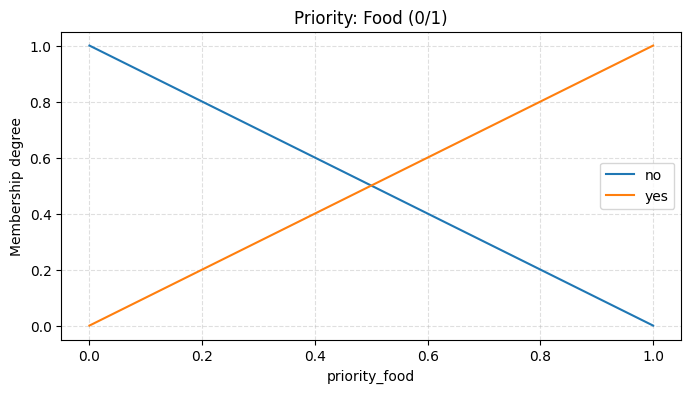

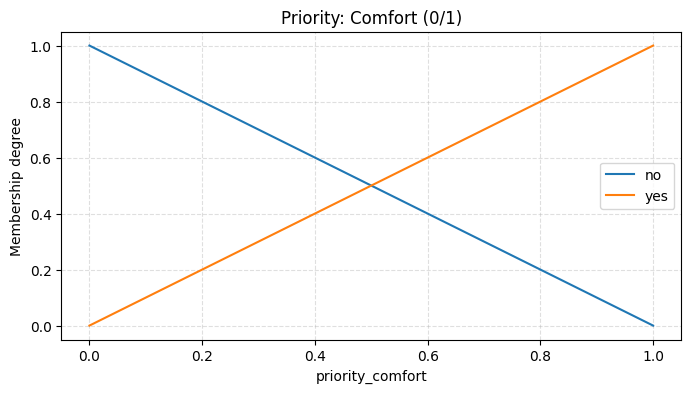

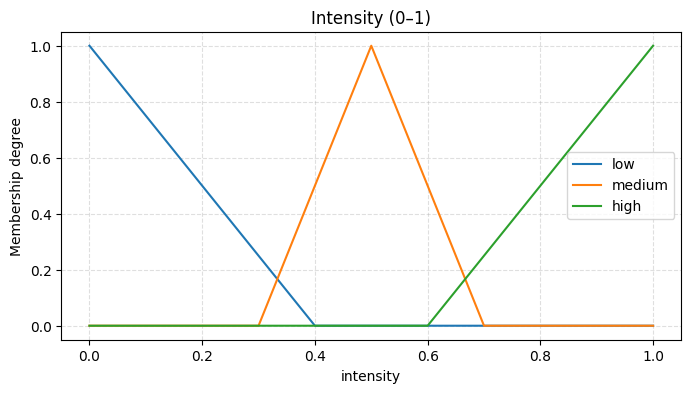

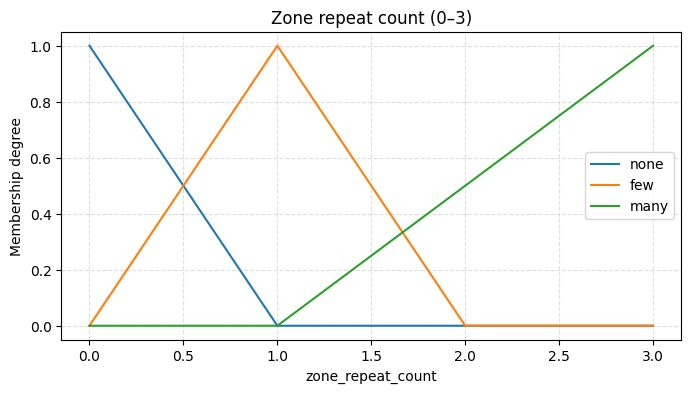

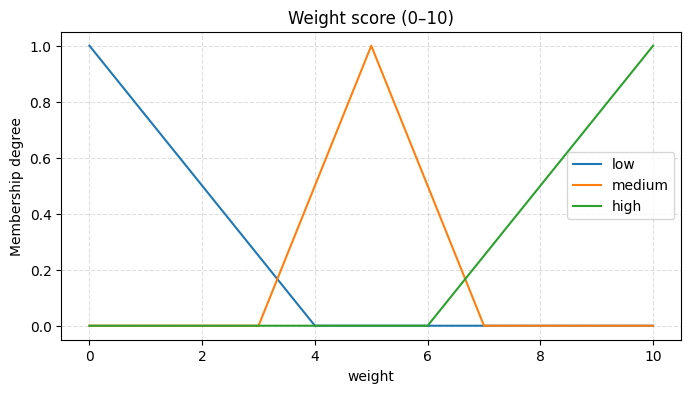

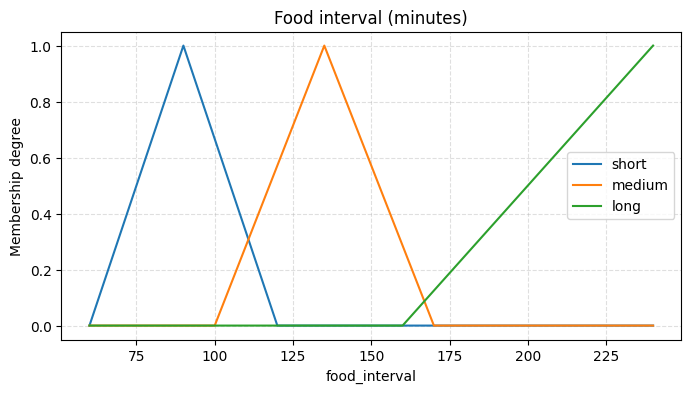

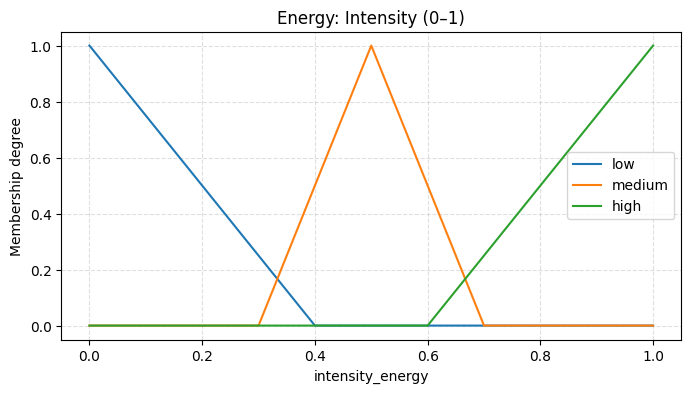

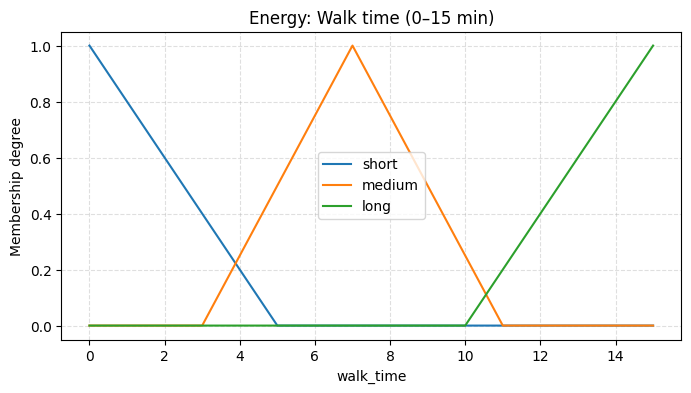

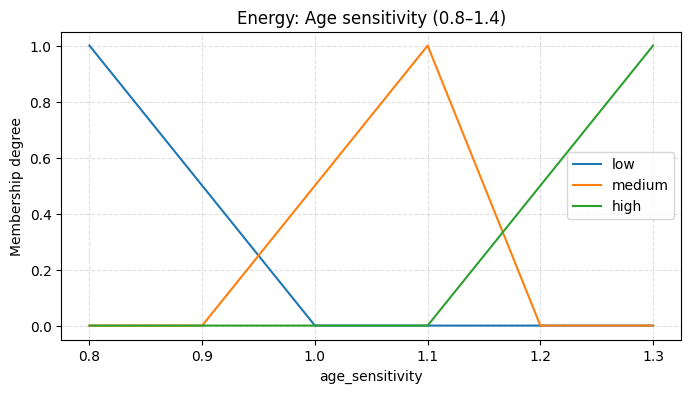

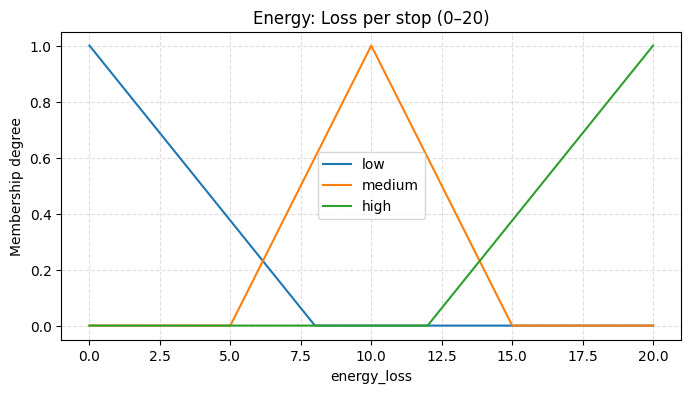

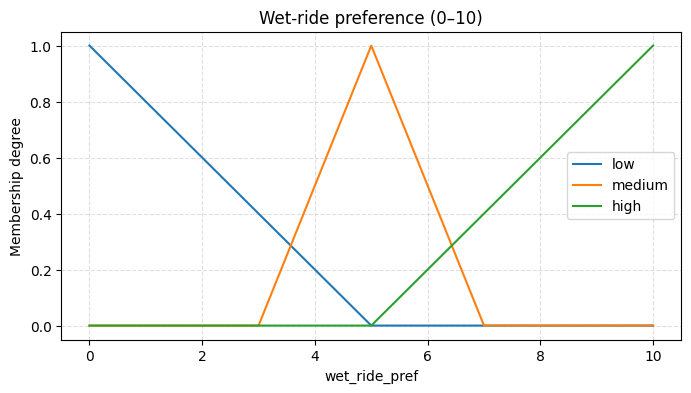

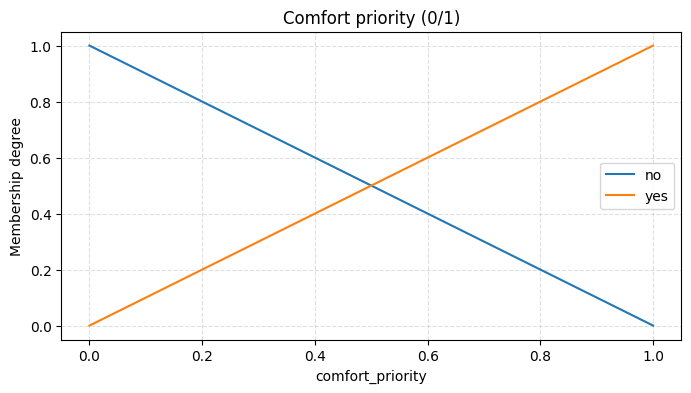

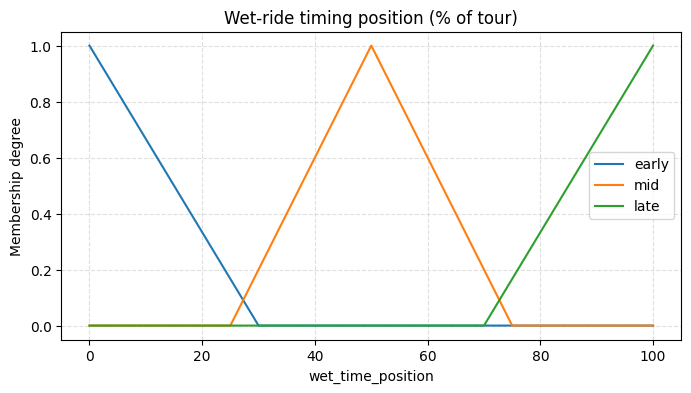

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

def plot_variable(var, title=None):
    plt.figure(figsize=(8, 4))
    for name, term in var.terms.items():
        plt.plot(var.universe, term.mf, label=name)
    plt.title(title or var.label)
    plt.xlabel(var.label)
    plt.ylabel("Membership degree")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

# Inputs
preference_input     = ctrl.Antecedent(np.arange(0, 11, 1), 'preference')         # 0–10
accessibility_input  = ctrl.Antecedent(np.arange(0.0, 1.1, 0.1), 'accessibility') # 0–1
wait_tolerance       = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'wait_tolerance')  # 0–1
walking_input        = ctrl.Antecedent(np.arange(0.0, 1.1, 0.1), 'walking')       # 0–1

priority_thrill      = ctrl.Antecedent(np.arange(0, 2, 1), 'priority_thrill')     # {0,1}
priority_food        = ctrl.Antecedent(np.arange(0, 2, 1), 'priority_food')       # {0,1}
priority_comfort     = ctrl.Antecedent(np.arange(0, 2, 1), 'priority_comfort')    # {0,1}

intensity_input      = ctrl.Antecedent(np.arange(0.0, 1.1, 0.1), 'intensity')     # 0–1
zone_repeat_count    = ctrl.Antecedent(np.arange(0, 4, 1), 'zone_repeat_count')   # 0–3

# Energy-loss subsystem
intensity_input_energy = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'intensity_energy')
walk_time_input        = ctrl.Antecedent(np.arange(0, 16, 1), 'walk_time')        # 0–15 min
age_sensitivity_input  = ctrl.Antecedent(np.arange(0.8, 1.4, 0.1), 'age_sensitivity')

# Wet-ride timing subsystem
wet_ride_pref    = ctrl.Antecedent(np.arange(0, 11, 1), 'wet_ride_pref')          # 0–10
comfort_priority = ctrl.Antecedent(np.arange(0, 2, 1), 'comfort_priority')        # {0,1}

# Outputs
weight_output      = ctrl.Consequent(np.arange(0, 11, 1), 'weight')               # 0–10
food_interval      = ctrl.Consequent(np.arange(60, 241, 1), 'food_interval')      # 60–240 (min)
energy_loss_output = ctrl.Consequent(np.arange(0, 21, 1), 'energy_loss')          # 0–20
wet_time_position  = ctrl.Consequent(np.arange(0, 101, 1), 'wet_time_position')   # 0–100%

# Preference (0–10)
preference_input['low']    = fuzz.trimf(preference_input.universe, [0, 0, 5])
preference_input['medium'] = fuzz.trimf(preference_input.universe, [2, 5, 8])
preference_input['high']   = fuzz.trimf(preference_input.universe, [5, 10, 10])

# Accessibility (0–1)
accessibility_input['poor']     = fuzz.trimf(accessibility_input.universe, [0.0, 0.0, 0.5])
accessibility_input['moderate'] = fuzz.trimf(accessibility_input.universe, [0.2, 0.5, 0.8])
accessibility_input['good']     = fuzz.trimf(accessibility_input.universe, [0.5, 1.0, 1.0])

# Wait tolerance (0–1)
wait_tolerance['low']    = fuzz.trimf(wait_tolerance.universe, [0.0, 0.0, 0.4])
wait_tolerance['medium'] = fuzz.trimf(wait_tolerance.universe, [0.2, 0.5, 0.8])
wait_tolerance['high']   = fuzz.trimf(wait_tolerance.universe, [0.6, 1.0, 1.0])

# Walking tolerance (0–1)
walking_input['short'] = fuzz.trimf(walking_input.universe, [0.0, 0.0, 0.4])
walking_input['medium']= fuzz.trimf(walking_input.universe, [0.2, 0.5, 0.8])
walking_input['long']  = fuzz.trimf(walking_input.universe, [0.6, 1.0, 1.0])

# Priorities (binary {0,1})
for priority in [priority_thrill, priority_food, priority_comfort]:
    priority['no']  = fuzz.trimf(priority.universe, [0, 0, 1])
    priority['yes'] = fuzz.trimf(priority.universe, [0, 1, 1])

# Intensity (0–1)
intensity_input['low']    = fuzz.trimf(intensity_input.universe, [0.0, 0.0, 0.4])
intensity_input['medium'] = fuzz.trimf(intensity_input.universe, [0.3, 0.5, 0.7])
intensity_input['high']   = fuzz.trimf(intensity_input.universe, [0.6, 1.0, 1.0])

# Weight output (0–10)
weight_output['low']    = fuzz.trimf(weight_output.universe, [0, 0, 4])
weight_output['medium'] = fuzz.trimf(weight_output.universe, [3, 5, 7])
weight_output['high']   = fuzz.trimf(weight_output.universe, [6, 10, 10])

# Food interval (minutes)
food_interval['short']  = fuzz.trimf(food_interval.universe, [60, 90, 120])
food_interval['medium'] = fuzz.trimf(food_interval.universe, [100, 135, 170])
food_interval['long']   = fuzz.trimf(food_interval.universe, [160, 240, 240])

# Zone repeat count (0–3)
zone_repeat_count['none'] = fuzz.trimf(zone_repeat_count.universe, [0, 0, 1])
zone_repeat_count['few']  = fuzz.trimf(zone_repeat_count.universe, [0, 1, 2])
zone_repeat_count['many'] = fuzz.trimf(zone_repeat_count.universe, [1, 3, 3])

# Energy-loss subsystem
intensity_input_energy['low']    = fuzz.trimf(intensity_input_energy.universe, [0.0, 0.0, 0.4])
intensity_input_energy['medium'] = fuzz.trimf(intensity_input_energy.universe, [0.3, 0.5, 0.7])
intensity_input_energy['high']   = fuzz.trimf(intensity_input_energy.universe, [0.6, 1.0, 1.0])

walk_time_input['short'] = fuzz.trimf(walk_time_input.universe, [0, 0, 5])
walk_time_input['medium']= fuzz.trimf(walk_time_input.universe, [3, 7, 11])
walk_time_input['long']  = fuzz.trimf(walk_time_input.universe, [10, 15, 15])

age_sensitivity_input['low']    = fuzz.trimf(age_sensitivity_input.universe, [0.8, 0.8, 1.0])
age_sensitivity_input['medium'] = fuzz.trimf(age_sensitivity_input.universe, [0.9, 1.1, 1.2])
age_sensitivity_input['high']   = fuzz.trimf(age_sensitivity_input.universe, [1.1, 1.3, 1.4])

energy_loss_output['low']    = fuzz.trimf(energy_loss_output.universe, [0, 0, 8])
energy_loss_output['medium'] = fuzz.trimf(energy_loss_output.universe, [5, 10, 15])
energy_loss_output['high']   = fuzz.trimf(energy_loss_output.universe, [12, 20, 20])

# Wet-ride timing subsystem
wet_ride_pref['low']    = fuzz.trimf(wet_ride_pref.universe, [0, 0, 5])
wet_ride_pref['medium'] = fuzz.trimf(wet_ride_pref.universe, [3, 5, 7])
wet_ride_pref['high']   = fuzz.trimf(wet_ride_pref.universe, [5, 10, 10])

comfort_priority['no']  = fuzz.trimf(comfort_priority.universe, [0, 0, 1])
comfort_priority['yes'] = fuzz.trimf(comfort_priority.universe, [0, 1, 1])

wet_time_position['early'] = fuzz.trimf(wet_time_position.universe, [0, 0, 30])
wet_time_position['mid']   = fuzz.trimf(wet_time_position.universe, [25, 50, 75])
wet_time_position['late']  = fuzz.trimf(wet_time_position.universe, [70, 100, 100])


# Core inputs
plot_variable(preference_input,    "Preference (0–10)")
plot_variable(accessibility_input, "Accessibility (0–1)")
plot_variable(wait_tolerance,      "Wait tolerance (0–1)")
plot_variable(walking_input,       "Walking tolerance (0–1)")

# Priority flags
plot_variable(priority_thrill,  "Priority: Thrill (0/1)")
plot_variable(priority_food,    "Priority: Food (0/1)")
plot_variable(priority_comfort, "Priority: Comfort (0/1)")

# Intensity & repeats
plot_variable(intensity_input,   "Intensity (0–1)")
plot_variable(zone_repeat_count, "Zone repeat count (0–3)")

# Outputs
plot_variable(weight_output,  "Weight score (0–10)")
plot_variable(food_interval,  "Food interval (minutes)")

# Energy-loss subsystem
plot_variable(intensity_input_energy, "Energy: Intensity (0–1)")
plot_variable(walk_time_input,        "Energy: Walk time (0–15 min)")
plot_variable(age_sensitivity_input,  "Energy: Age sensitivity (0.8–1.4)")
plot_variable(energy_loss_output,     "Energy: Loss per stop (0–20)")

# Wet-ride timing
plot_variable(wet_ride_pref,     "Wet-ride preference (0–10)")
plot_variable(comfort_priority,  "Comfort priority (0/1)")
plot_variable(wet_time_position, "Wet-ride timing position (% of tour)")